In [1]:
# expand jupyter notebook cell width to 100% of window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

#print(Base.classes.keys())
#print("---------------")

#for title in session.query(measurement.JobTitle).filter(Salaries.TotalPay >= "250000"):
#   print(title)
#print(Measurement.__dict__)
#print(Station.__dict__)
#print("---------------")

# columns: id <int>, station <text>, date <text>, prcp <float>, tobs <float>
#for row in engine.execute("SELECT id, station, date, prcp, tobs FROM Measurement LIMIT 5"):

result_jun = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()

#for row in result_jun:
#    print(row)


In [6]:
#  3. Convert the June temperatures to a list.
print(type(result_jun))

<class 'list'>


In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd
df_jun = pd.DataFrame(result_jun, columns=['June Temps'])

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_jun.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


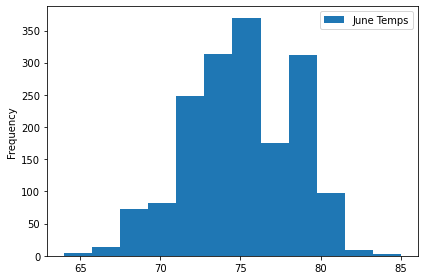

In [9]:
import matplotlib.pyplot as plt
df_jun.plot.hist(bins=12)
plt.tight_layout()

### Additional query #1 required for Analysis Summary in README.md - June precipitation data

In [10]:
result_rain_jun = session.query(Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "06").all()
df_rain_jun = pd.DataFrame(result_rain_jun, columns=['June Rains'])
df_rain_jun.describe()


,June Rains
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


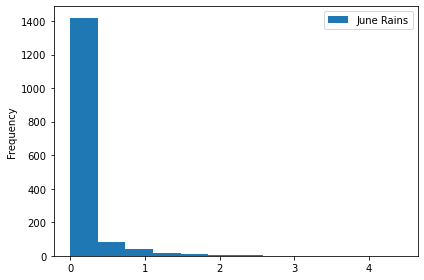

In [11]:
df_rain_jun.plot.hist(bins=12)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
result_dec = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()

In [13]:
# 7. Convert the December temperatures to a list.
print(type(result_dec))

<class 'list'>


In [14]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(result_dec, columns=['December Temps'])

In [15]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


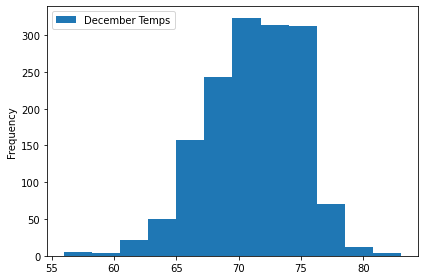

In [16]:
df_dec.plot.hist(bins=12)
plt.tight_layout()

### Additional query #2 required for Analysis Summary in README.md - December precipitation data

In [17]:
result_rain_dec = session.query(Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "12").all()
df_rain_dec = pd.DataFrame(result_rain_jun, columns=['December Rains'])
df_rain_dec.describe()

,December Rains
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


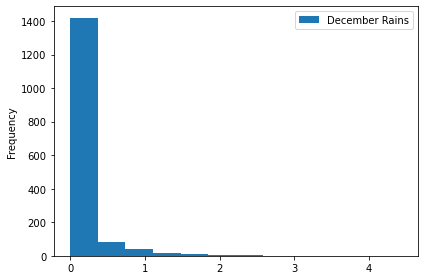

In [18]:
df_rain_dec.plot.hist(bins=12)
plt.tight_layout()